In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
plt.rcParams['font.sans-serif']=['SimHei']

# 1. 了解数据

In [32]:
data = pd.read_csv('train.csv')

In [33]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<div align='center' ><font size='4'>字段含义表</font></div>

|序号|字段|含义|具体描述|
|---|---|---|---|
|0|datetime|年-月-日-小时||
|1|season|季节|1:春天；2：夏天；3：秋天；4：冬天|
|2|holiday|节假日|0：否；1：是|
|3|workingday|工作日|0：否；1：是|
|4|weather|天气|1:晴天；2:阴天；3:小雨或小雪；4:恶劣天气|
|5|temp|实际温度|摄氏度|
|6|atemp|体感温度|摄氏度|
|7|humidity|湿度|相对湿度|
|8|windspeed|风速||
|9|casual|未注册用户租赁数量||
|10|registered|未注册用户租赁数量||
|11|count|总租赁数量||

**目的：共享单车使用量与哪些因素有关？这些因素如何影响人们使用单车？**

# 2. 数据预处理
## 2.1 缺失值检查

In [34]:
data.info()
#无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# 2.2 时间特征处理
从datetime中提取年、月、工作日、日期等信息

In [35]:
data['date']=data.datetime.apply(lambda x : x.split( )[0])
data['year']=data.datetime.apply(lambda x : x.split( )[0].split('-')[0]).astype('int')
data['month']=data.datetime.apply(lambda x : x.split( )[0].split('-')[1]).astype('int')
data['weekday']=data.date.apply(lambda x : datetime.strptime(x,'%Y-%m-%d').isoweekday())
data['hour']=data.datetime.apply(lambda x : x.split( )[1].split(':')[0]).astype('int')
data.drop('datetime',axis=1,inplace=True)

In [37]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,0,6
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,6
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,2,6
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,3,6
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,4,6


In [100]:
data['weekday'].unique()

array([6, 7, 1, 2, 3, 4, 5], dtype=int64)

# 3. 分析特征

Text(0.5, 1, 'Heatmap on Correlation')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text yticklabel objects>)

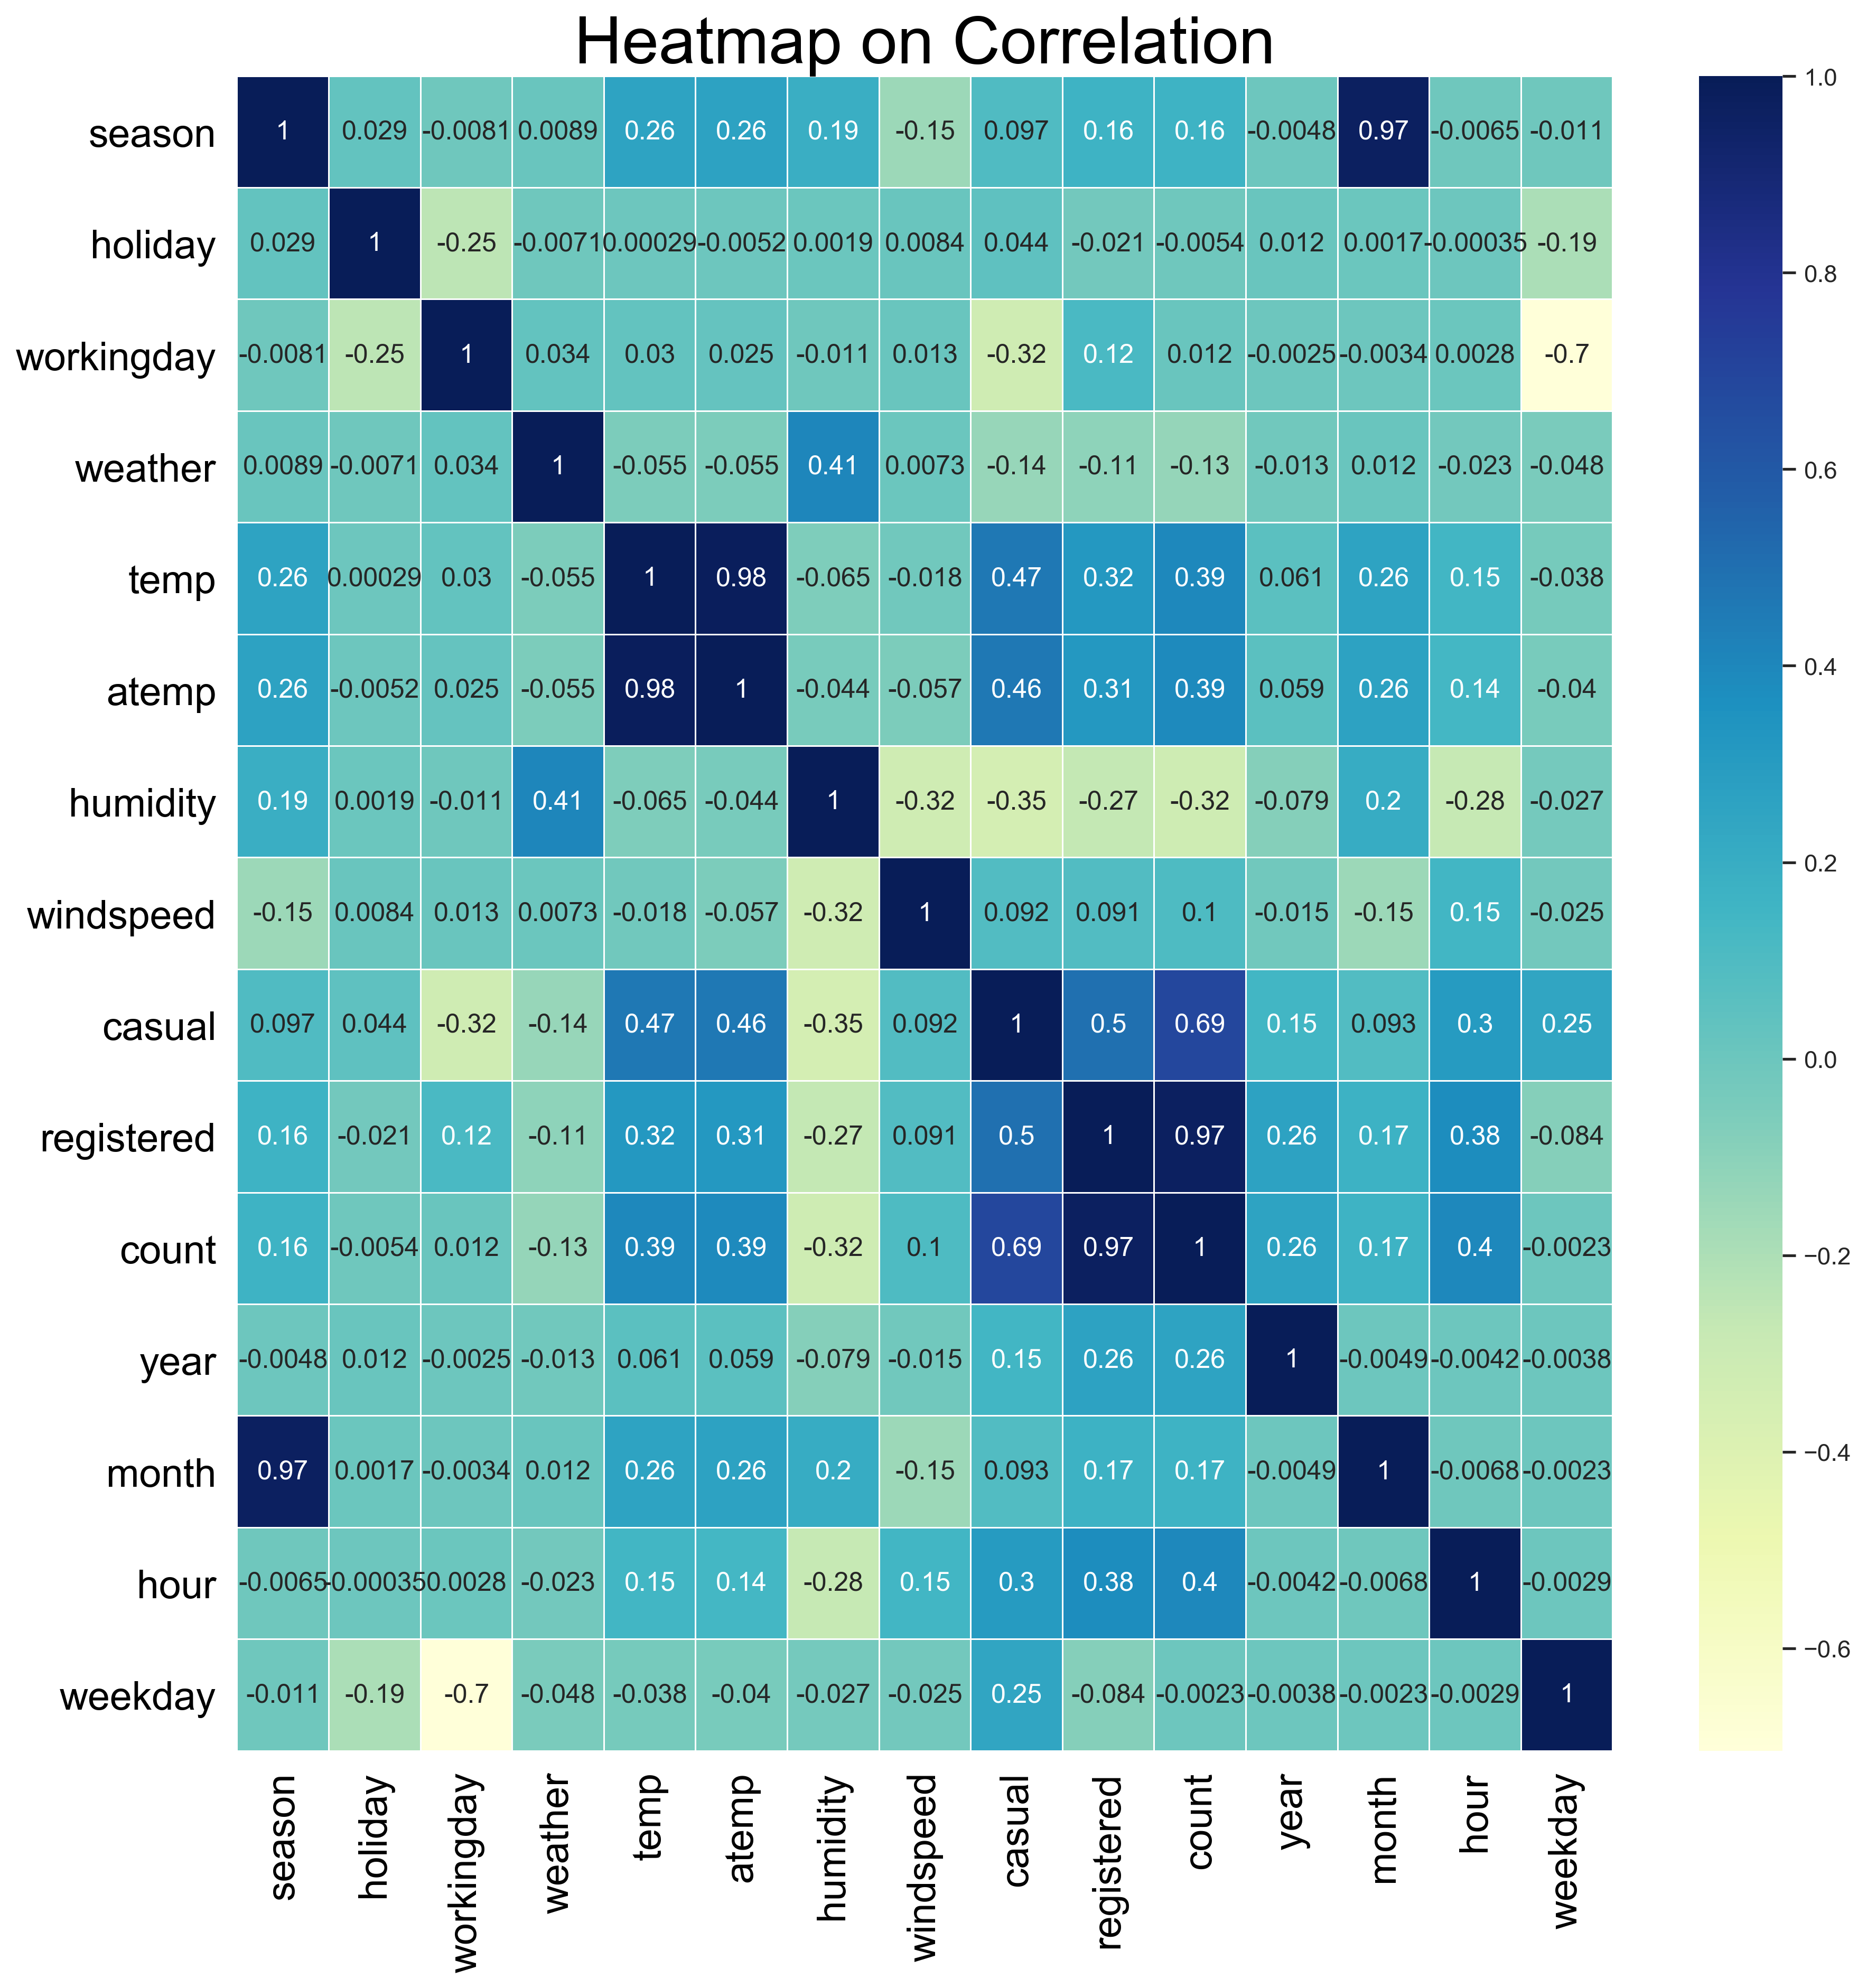

In [59]:
fig = plt.figure(figsize=(14,14),dpi=300)
ax1 = fig.add_subplot(1,1,1)
sns.set(style='dark')
corr = data.corr()
sns.heatmap(corr,ax=ax1,vmax=1,square=False,annot=True,cmap='YlGnBu',linewidths=.5)
plt.title('Heatmap on Correlation',fontsize=30,color='black')
plt.xticks(fontsize=18,color='black')
plt.yticks(fontsize=18,color='black')
plt.show()

In [51]:
corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
weekday      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

可以看到，租借量
- 与小时成正相关，说明一天中租车量与时间有线性关系
- 与温度/成正相关，说明温度升高总产量也增加
- 与湿度成反相关，说明湿度较大时人们不愿骑车

温湿度等因素与季节月份相关，需进一步可视化分析各特征对count的影响

<Figure size 1800x1200 with 0 Axes>

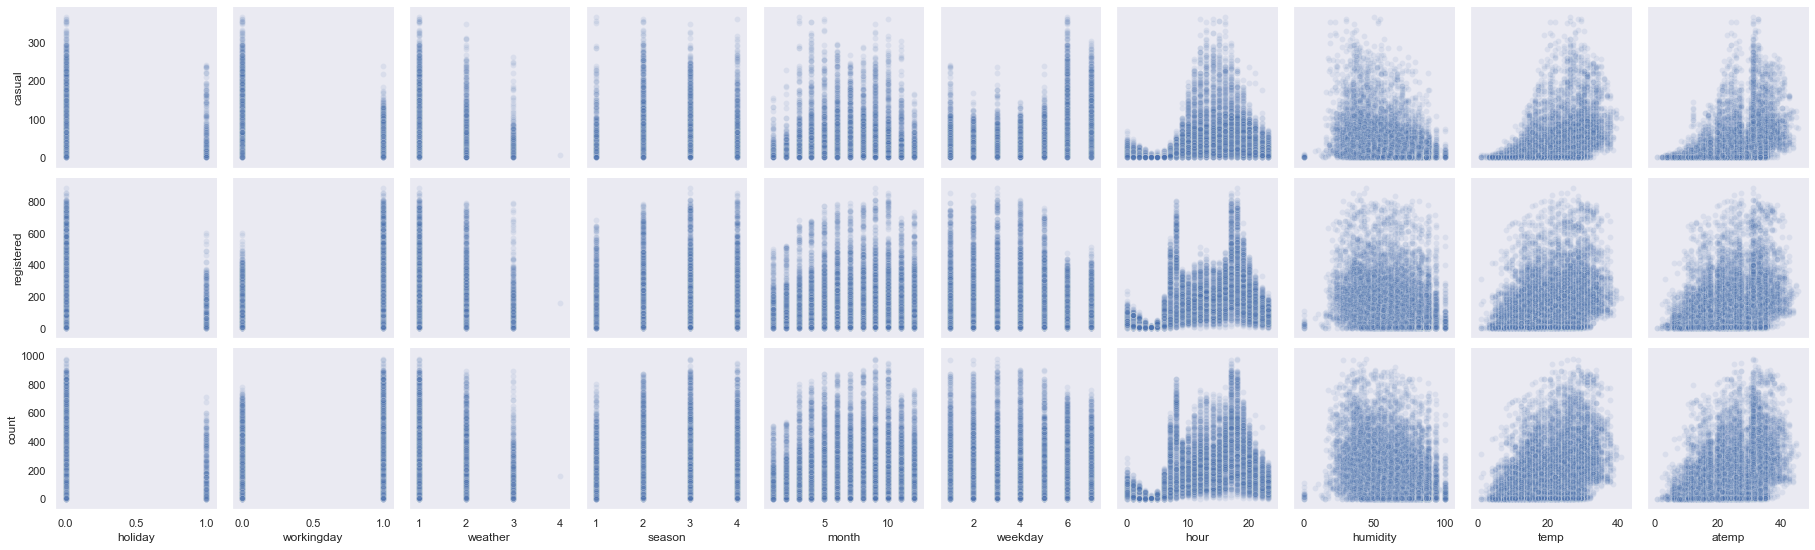

In [56]:
fig = plt.figure(dpi=300)
sns.pairplot(data
             ,x_vars=['holiday','workingday','weather','season','month','weekday','hour','humidity','temp','atemp']
             ,y_vars=['casual','registered','count']
             ,plot_kws={'alpha':0.1})

- 会员在工作日出行多，节假日周末出行少，临时用户则相反；
- 租赁数量随天气等级上升而减少；
- 第一季度出行人数总体偏少；
- 小时数对租赁情况影响明显，会员呈现两个高峰，临时用户呈现一个正态分布；
- 租赁数量随风速增大而减少；
- 温度、湿度对临时用户影响比较大，对会员影响较小

# 4. 进一步可视化分析
## 4.1 时段对租借量的影响

### 4.1.1 每小时租借量的租借情况

[Text(0, 0.5, 'user count'), Text(0.5, 0, 'hour')]

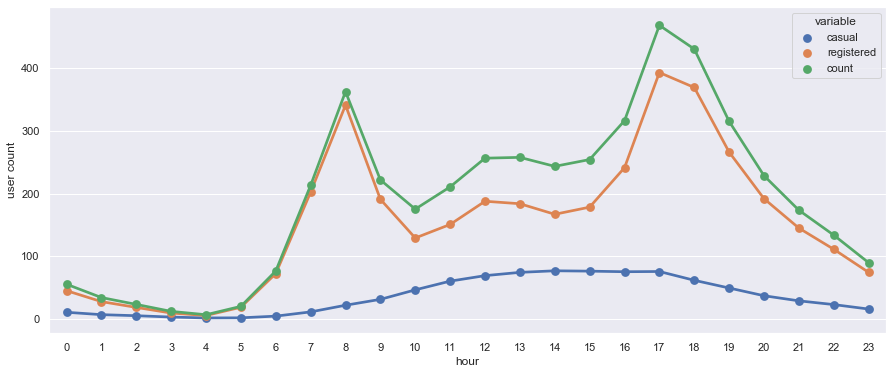

In [87]:
sns.set_style("darkgrid")
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
hourTransformed = pd.melt(data[['hour','casual','registered','count']]
                          ,id_vars=['hour']
                          ,value_vars=['casual','registered','count'])

houruserAggregated = pd.DataFrame(hourTransformed.groupby(['hour','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=houruserAggregated['hour'],y=houruserAggregated['value']
              ,hue=houruserAggregated['variable']
              ,hue_order=['casual','registered','count']
              #,color='#00ced1'
             )
ax.set(xlabel='hour',ylabel='user count')

- 6点到9点以及17点到19点之间使用共享单车的人数达到峰值（上下班时间）
- 平均每天单车使用量最大的时间点是在晚上17点左右
- 临时用户起伏比较平缓，高峰期在17点左右；并且会员用户的用车数量远超过临时用户

### 4.1.2 每星期每天每个时段的租借情况

[Text(0, 0.5, 'user count'), Text(0.5, 0, 'hour')]

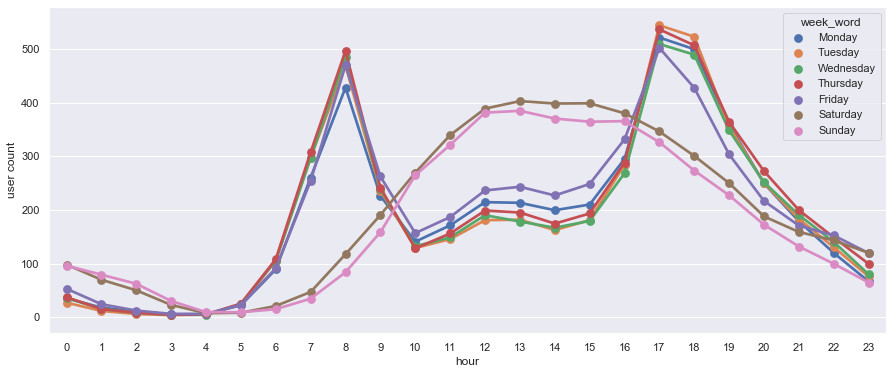

In [101]:
weekDict = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
sns.set_style("darkgrid")
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
hourweekAggregated = pd.DataFrame(data.groupby(['hour','weekday'],sort=True)['count'].mean()).reset_index()
hourweekAggregated['week_word']=hourweekAggregated['weekday'].map(weekDict)
sns.pointplot(x=hourweekAggregated['hour'],y=hourweekAggregated['count']
              ,hue=hourweekAggregated['week_word']
              ,data=hourweekAggregated
              #,color='#00ced1'
             )
ax.set(xlabel='hour',ylabel='user count')

- 工作日时，平均租借量存在早高峰时段（7-9点）和晚高峰时段（17-19点）
- 周末时，平均租借量在12-16点平稳

### 4.1.3 工作日及非工作日每个时段的租借情况

[Text(0, 0.5, 'user count'), Text(0.5, 0, 'hour')]

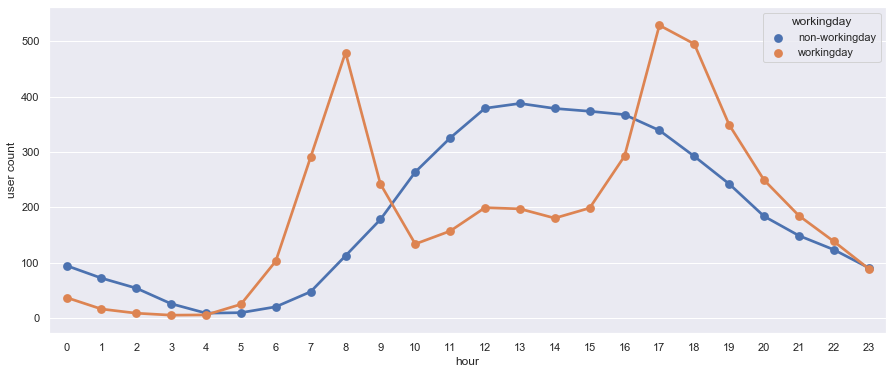

In [105]:
workingdayDict = {0:'non-workingday',1:'workingday'}
sns.set_style("darkgrid")
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
hourweekAggregated = pd.DataFrame(data.groupby(['hour','workingday'],sort=True)['count'].mean()).reset_index()
hourweekAggregated['workingday']=hourweekAggregated['workingday'].map(workingdayDict)
sns.pointplot(x=hourweekAggregated['hour'],y=hourweekAggregated['count']
              ,hue=hourweekAggregated['workingday']
              ,data=hourweekAggregated
              #,color='#00ced1'
             )
ax.set(xlabel='hour',ylabel='user count')

- 工作日对于会员用户上下班时间是两个用车高峰，而中午也会有一个小高峰，猜测可能是外出午餐的人；
- 对非工作日而言租赁数量随时间呈现一个正态分布，高峰在13点左右，低谷在4点左右，且分布比较均匀

### 4.1.4 不同季节每个时段租借情况

[Text(0, 0.5, 'user count'), Text(0.5, 0, 'hour')]

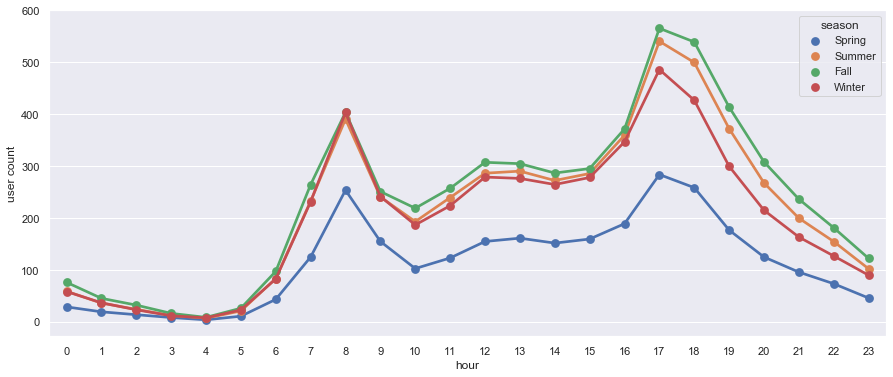

In [107]:
seasonDict = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
sns.set_style("darkgrid")
fig,ax = plt.subplots()
fig.set_size_inches(15,6)
hourweekAggregated = pd.DataFrame(data.groupby(['hour','season'],sort=True)['count'].mean()).reset_index()
hourweekAggregated['season']=hourweekAggregated['season'].map(seasonDict)
sns.pointplot(x=hourweekAggregated['hour'],y=hourweekAggregated['count']
              ,hue=hourweekAggregated['season']
              ,data=hourweekAggregated
              #,color='#00ced1'
             )
ax.set(xlabel='hour',ylabel='user count')

## 4.2 日期对租借量的影响

考虑到相同日期是否工作日，星期几，以及所属年份等信息是一样的，把租赁数据按天求和，其它日期类数据取平均值

In [118]:
day_data = data.groupby(['date'],as_index=False).agg({'casual':'sum','registered':'sum','count':'sum'
                                                    ,'workingday':'mean','holiday':'mean','weekday':'mean'})

In [119]:
day_data.head()

,date,casual,registered,count,workingday,holiday,weekday
0,2011-01-01,331,654,985,0.0,0.0,6.0
1,2011-01-02,131,670,801,0.0,0.0,7.0
2,2011-01-03,120,1229,1349,1.0,0.0,1.0
3,2011-01-04,108,1454,1562,1.0,0.0,2.0
4,2011-01-05,82,1518,1600,1.0,0.0,3.0


### 4.2.1 工作日

In [124]:
workingday_data = day_data.groupby(['workingday'],as_index=False).agg({'casual':'mean','registered':'mean'})
workingday_data

,workingday,casual,registered
0,0.0,1420.944828,3095.413793
1,1.0,598.385852,4001.627010


In [139]:
workingday_data0 = workingday_data.loc[0]
workingday_data1 = workingday_data.loc[1]

Text(0.5, 1.0, 'Average number of rentals initiated per day')

([<matplotlib.axis.XTick at 0x2289b116508>,
 <a list of 2 Text xticklabel objects>)

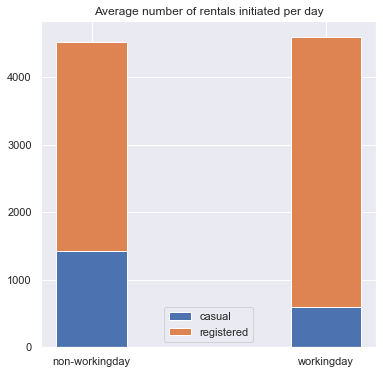

In [165]:
fig = plt.figure(figsize=(6,6))
p1 = plt.bar(workingday_data.index,workingday_data['casual'],width)
p2 = plt.bar(workingday_data.index,workingday_data['registered'],width,bottom=workingday_data['casual'])
plt.title('Average number of rentals initiated per day')
plt.xticks([0,1],('non-workingday','workingday'),rotation=0)
plt.legend((p1[0],p2[0]),('casual','registered'))

([<matplotlib.patches.Wedge at 0x2289b440248>,
 [Text(0.9652771654982154, 1.4656960782398687, 'casual'),
  Text(-0.9652768910414574, -1.4656962589913842, 'registered')],
 [Text(0.4290120735547624, 0.6514204792177194, '31.5%'),
  Text(-0.42901195157398103, -0.6514205595517263, '68.5%')])

(-1.4463947899877891,
 1.4307807963516888,
 -1.4402282107856554,
 1.4450530833955637)

Text(0.5, 1.0, 'non-workingday')

([<matplotlib.patches.Wedge at 0x2289b478f48>,
 [Text(1.6104764067380148, 0.6974171946118137, 'casual'),
  Text(-1.6104763414410976, -0.6974173453954936, 'registered')],
 [Text(0.7157672918835621, 0.30996319760525054, '13.0%'),
  Text(-0.7157672628627101, -0.3099632646202194, '87.0%')])

(-1.4373724636034702,
 1.4303510988055528,
 -1.4388410629724844,
 1.43797243637655)

Text(0.5, 1.0, 'workingday')

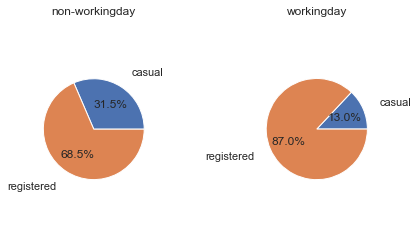

In [166]:
plt.subplots_adjust(hspace=1,wspace=1) #设置子图表间隔
grid = plt.GridSpec(2,2,wspace=2,hspace=2) #设置子图表坐标轴对齐

plt.subplot2grid((2,2),(1,1),rowspan=2)
width=0.3 #设置条宽

plt.subplot2grid((2,2),(0,0),rowspan=2)
plt.pie(workingday_data0[['casual','registered']],labels=['casual','registered']
        ,autopct='%1.1f%%'
        ,pctdistance=0.6
        ,labeldistance=1.35
        ,radius=1.3)
plt.axis('equal')
plt.title('non-workingday')

plt.subplot2grid((2,2),(0,1),rowspan=2)
plt.pie(workingday_data1[['casual','registered']],labels=['casual','registered']
        ,autopct='%1.1f%%'
        ,pctdistance=0.6
        ,labeldistance=1.35
        ,radius=1.3)
plt.axis('equal')
plt.title('workingday')

### 4.2.2 周末及节假日

([<matplotlib.axis.XTick at 0x2289917b888>,
 <a list of 7 Text xticklabel objects>)

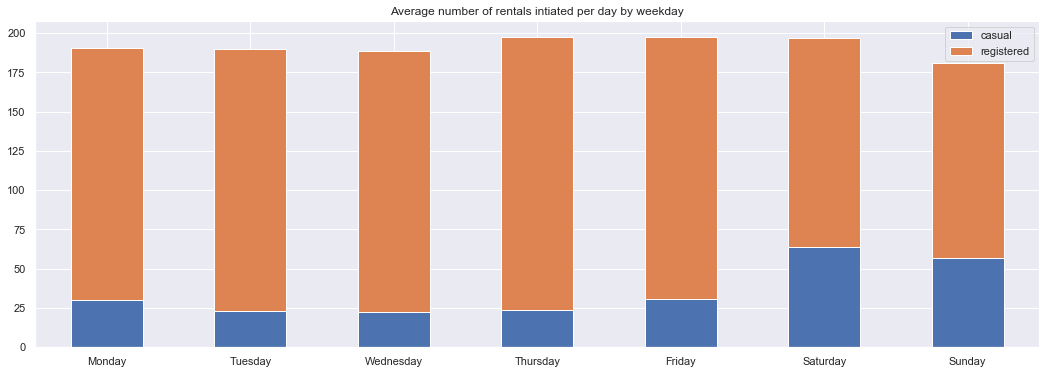

In [189]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
weekday_data = data.groupby(['weekday'],as_index=False).agg({'casual':'mean','registered':'mean'})
weekday_data=weekday_data[['casual','registered']]
weekday_data.plot.bar(stacked=True,title='Average number of rentals intiated per day by weekday',ax=ax)
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#ax.set_xticks(labels)
plt.xticks(np.arange(7),labels,rotation=0)

([<matplotlib.axis.XTick at 0x2289d870148>,
 <a list of 2 Text xticklabel objects>)

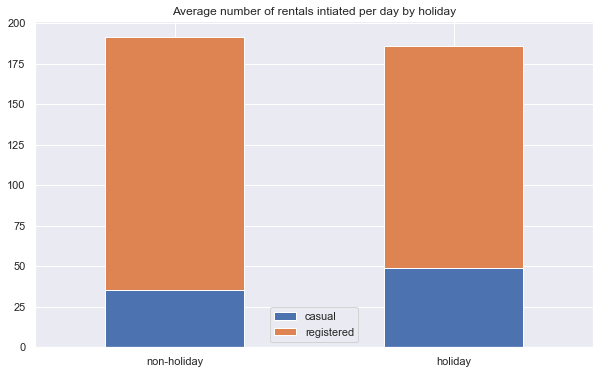

In [205]:
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
holiday_data = data.groupby(['holiday'],as_index=False).agg({'casual':'mean','registered':'mean'})
holiday_data = holiday_data[['casual','registered']]
holiday_data.plot.bar(stacked=True,title='Average number of rentals intiated per day by holiday',ax=ax)

labels=['non-holiday','holiday']
#ax.set_xticks(labels)
plt.xticks(np.arange(2),labels,rotation=0)

- 工作日会员用户出行数量较多，临时用户出行数量较少；
- 周末及节假日会员用户租赁数量降低，临时用户租赁数量增加

## 4.3 温度对租借量的影响

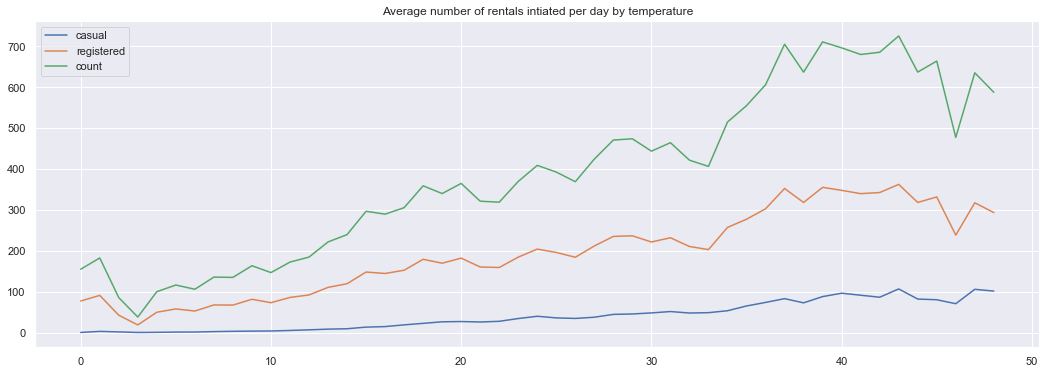

In [213]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
temp_data = data.groupby(['temp'],as_index=False).agg({'casual':'mean','registered':'mean','count':'mean'})
temp_data = temp_data[['casual','registered','count']]
temp_data.plot(stacked=True,title='Average number of rentals intiated per day by temperature',ax=ax)

- 随气温上升租车数量总体呈现上升趋势，但在气温超过36时开始下降
- 在气温3度时达到最低点

## 4.4 湿度对租借量的影响

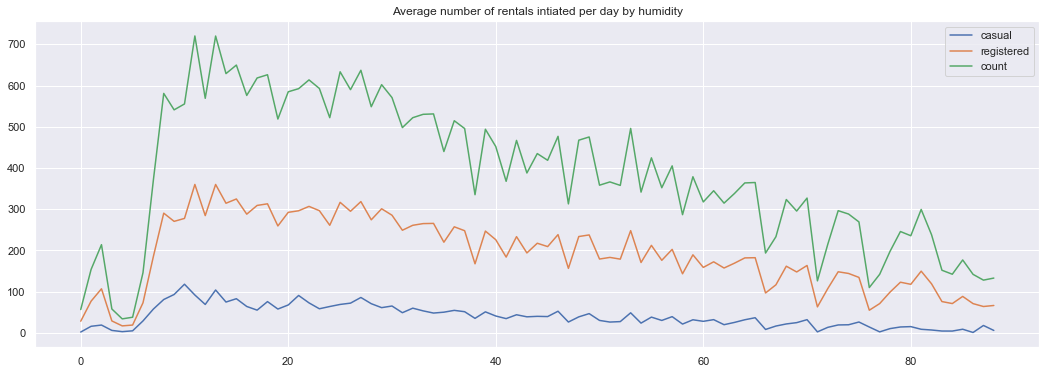

In [214]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
humidity_data = data.groupby(['humidity'],as_index=False).agg({'casual':'mean','registered':'mean','count':'mean'})
humidity_data = humidity_data[['casual','registered','count']]
humidity_data.plot(stacked=True,title='Average number of rentals intiated per day by humidity',ax=ax)

- 湿度在10左右租赁数量迅速达到高峰值，此后缓慢递减

## 4.5 每月租借量情况

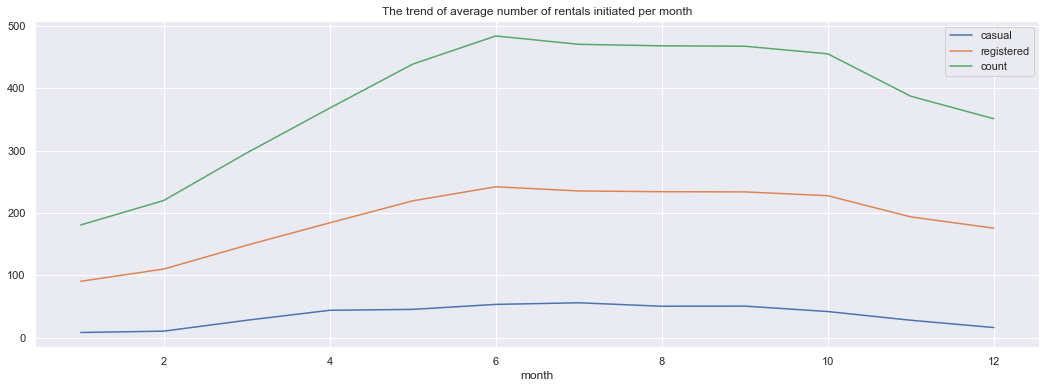

In [221]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
season_data = data.groupby(['month'],as_index=True).agg({'casual':'mean','registered':'mean','count':'mean'})
season_data = season_data[['casual','registered','count']]
season_data.plot(stacked=True,title='The trend of average number of rentals initiated per month',ax=ax)

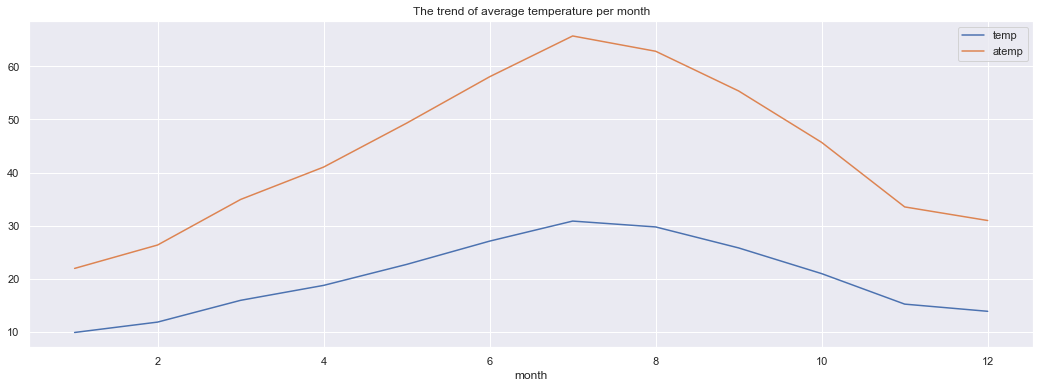

In [225]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
temp_data = data.groupby(['month'],as_index=True).agg({'temp':'mean','atemp':'mean'})
temp_data = temp_data[['temp','atemp']]
temp_data.plot(stacked=True,title='The trend of average temperature per month',ax=ax)

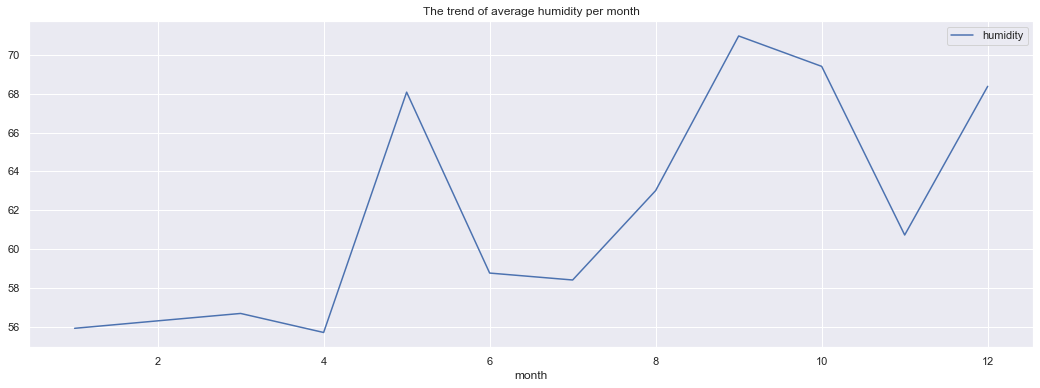

In [226]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
humidity_data = data.groupby(['month'],as_index=True).agg({'humidity':'mean'})
humidity_data = humidity_data[['humidity']]
humidity_data.plot(stacked=True,title='The trend of average humidity per month',ax=ax)

[Text(0, 0.5, 'Average count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average count by month')]

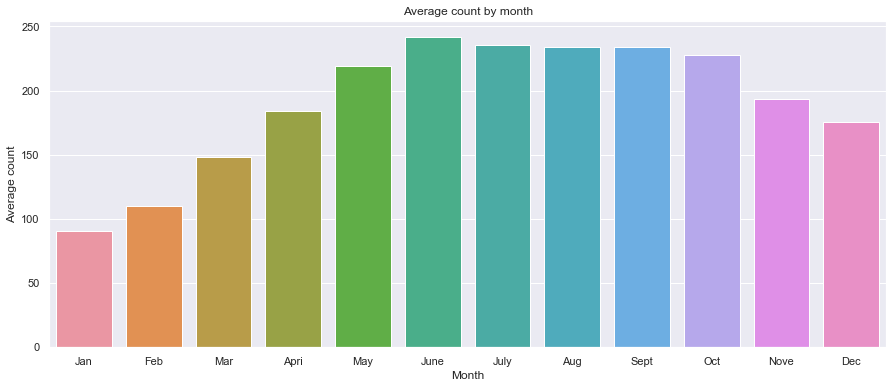

In [232]:
monthDict={1:'Jan',  2:'Feb',  3:'Mar',  4:'Apri',  5:'May',  6:'June'
           ,7:'July',  8:'Aug',  9:'Sept', 10:'Oct', 11:'Nove', 12:'Dec'}
fig,(ax)=plt.subplots()
fig.set_size_inches(15,6)
monthAgg = pd.DataFrame(data.groupby('month')['count'].mean()).reset_index()
monthAgg['monthword']=monthAgg['month'].map(monthDict)
sns.barplot(data=monthAgg,x='monthword',y='count')
ax.set(xlabel='Month',ylabel='Average count',title='Average count by month')

- 第一季度共享单车租赁数量最小，6月为全年租赁数量峰值
- 全年夏秋两季租赁情况较好

# 5 总结

- 租赁用户整体在工作日上下班早上8点左右，晚上17-18点期间使用量峰值，中午12-13点出现小峰值。对非工作日而言租赁数量随时间呈现一个正态分布，高峰在13点左右，低谷在4点左右，且分布比较均匀。租赁用户主要以会员为主，但周末节假日非会员用户使用量会相较工作日提升50%+。

建议：在租赁峰值区间重点加强运营，注意该时间段客服的响应速度，重点区域车辆的配备及检查。因为周末非会员用户使用量增加，可对非会员用户重点营销，提供新会员优惠活动等手段拉新。

- 共享单车使用旺季是在夏秋两季（5-10月），6月为全年峰值，第一季度共享单车租赁数量最小。

建议：在旺季可以应季推出品牌活动，加强车辆运营，提升用户与品牌之间的互动感和体验感。在淡季需要重点营销，采用优惠，月卡、季卡等促销手段促进租车数量。同时趁着此时间段做好单车保养后勤等工作。

- 对于个人：明确单车使用高峰期，提前做好准备，以免耽误出行。

参考：
- https://blog.csdn.net/weixin_39701834/article/details/111339680
- https://zhuanlan.zhihu.com/p/168770845